STEP 1: LOADING AND INSPECTING DATA
In this step, we load the Netflix Movies and TV Shows dataset and perform an initial inspection to understand its structure, data types, and missing values.

In [42]:
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [43]:
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
df = pd.read_csv('netflix_titles.csv');
# first 5 rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Analysis
**Attributes:**  
- show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description

We will perform data cleaning and analysis, such as counting shows per director, classifying shows by country of origin, and exploring trends by year.

---

In [11]:
# checking how large is the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Analysis

The columns with the most missing values are `country` and `cast`.

---

In [12]:
# Some statistical analysis
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Analysis

There is limited statistical data since most columns are non-numeric.

---

# STEP 2: DATA CLEANING

We handle missing values by:
- Dropping rows with missing values in critical columns (`date_added`, `rating`, `duration`)
- Filling missing values in `director`, `cast`, and `country` with `"Unknown"` to preserve data integrity

---

For `director`, `cast`, and `country`, missing values are filled with `"Unknown"`.

---

In [27]:
# checking null values
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Significant amount of nulls in directors, cast and counttries (so we cant drop that values), we can drop rows for date_addedrating and duration

In [28]:
df.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

For directors,cast and countries we fill with unknown

In [33]:
df[['director', 'cast', 'country']] = df[['director', 'cast', 'country']].fillna(value="Unknown")

In [34]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# ANALYSIS

---

# Breakdown of Netflix Content: Movies vs. TV Shows

We analyze the distribution of Movies and TV Shows on Netflix. Movies make up the majority of the content.

---


Raw Counts:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In Percentage:
type
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64


C:\Users\aades\AppData\Local\Temp\ipykernel_11864\4142345913.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='viridis')


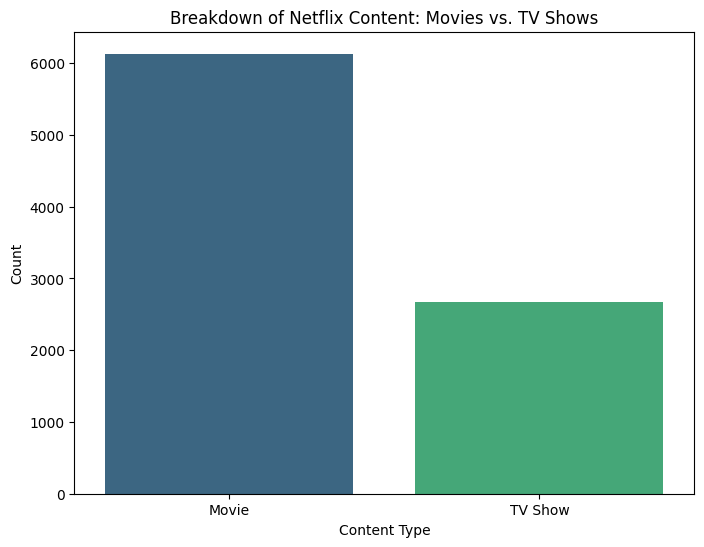

In [44]:
# --- To get the raw counts ---
# Select the 'type' column and apply .value_counts()
content_counts = df['type'].value_counts()
print("Raw Counts:")
print(content_counts)

# --- To get the percentages ---
# Use the normalize=True argument to get the proportion, then multiply by 100
content_percentage = df['type'].value_counts(normalize=True) * 100
print("\nIn Percentage:")
print(content_percentage)

# --- To visualize the result ---
# A count plot from Seaborn is perfect for this
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df, palette='viridis')
plt.title('Breakdown of Netflix Content: Movies vs. TV Shows')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()


# Top 5 Most Common Actors on Netflix

By processing the `cast` column, we identify the five actors with the most appearances across Netflix titles.

---

C:\Users\aades\AppData\Local\Temp\ipykernel_11864\3269220653.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.values, y=top_actors.index, palette='viridis')


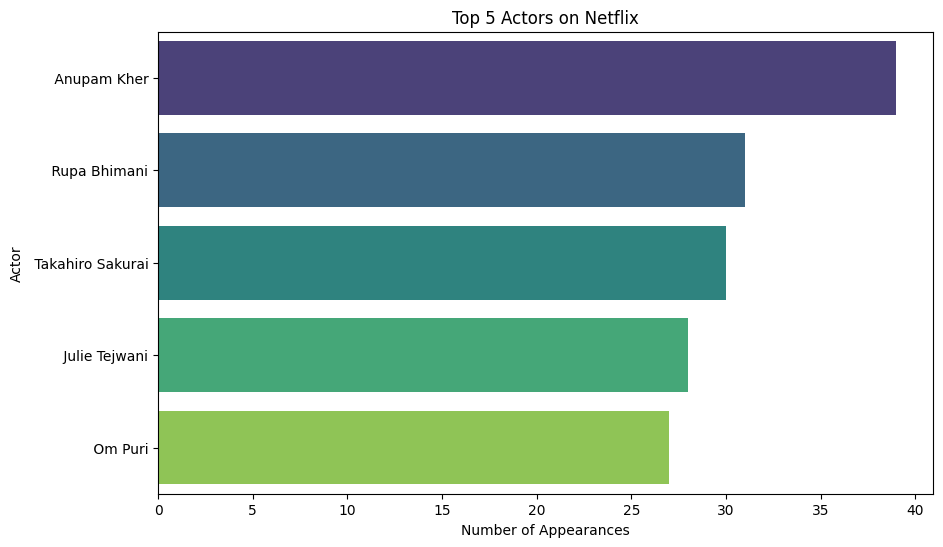

In [70]:
# Who are the top 5 most common actors listed in the cast column?
splitted_cast = df['cast'].str.split(",")
splitted_cast.dropna(inplace=True);
cast_series = pd.Series(splitted_cast.sum())
cast_series.value_counts().head()
# lets visualize the top 5 actors
plt.figure(figsize=(10, 6))
top_actors = cast_series.value_counts().head(5)
sns.barplot(x=top_actors.values, y=top_actors.index, palette='viridis')
plt.title('Top 5 Actors on Netflix')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor')
plt.show()

# Top 10 Countries Producing Content on Netflix

We analyze the `country` column to find the top 10 countries producing the most content for Netflix. The United States leads by a wide margin, followed by India and other countries.


C:\Users\aades\AppData\Local\Temp\ipykernel_11864\4001697639.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


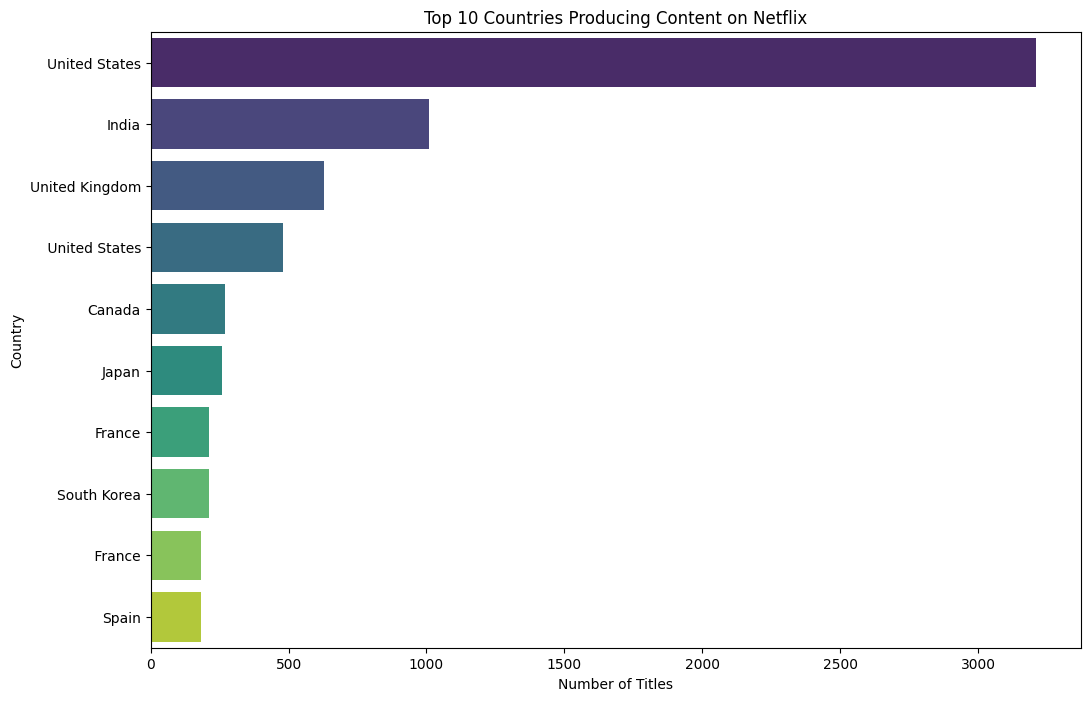

In [71]:
# How about analyzing the Top 10 Countries that produce the most content on Netflix?
country_series = df['country'].str.split(",").explode().value_counts()
country_series.head(10)
# Visualizing the top 10 countries
plt.figure(figsize=(12, 8))
top_countries = country_series.head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries Producing Content on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()